In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Download, Load, and Visualize the Data

We'll start by extracting the train-test data from the provided files.

In [48]:
train_images_file = np.load('kmnist-train-imgs.npz')
train_images = train_images_file['arr_0']
train_images_file.close()
train_images.shape

(60000, 28, 28)

In [49]:
train_labels_file = np.load('kmnist-train-labels.npz')
train_labels = train_labels_file['arr_0']
train_labels.shape

(60000,)

In [50]:
test_images_file = np.load('kmnist-test-imgs.npz')
test_images = test_images_file['arr_0']
test_images.shape

(10000, 28, 28)

In [51]:
test_labels_file = np.load('kmnist-test-labels.npz')
test_labels = test_labels_file['arr_0']
test_labels.shape

(10000,)

We'll spot-check the data by visualizing a few of the samples for the first 4 classes.

In [99]:
label_0 = filter(lambda x: x[1] == 0, zip(train_images, train_labels))
label_1 = filter(lambda x: x[1] == 1, zip(train_images, train_labels))
label_2 = filter(lambda x: x[1] == 2, zip(train_images, train_labels))
label_3 = filter(lambda x: x[1] == 3, zip(train_images, train_labels))

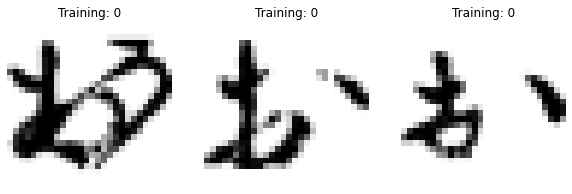

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(label_0)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % image[1])

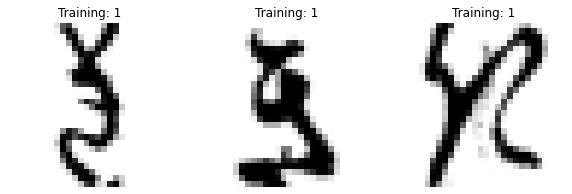

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(label_1)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % image[1])

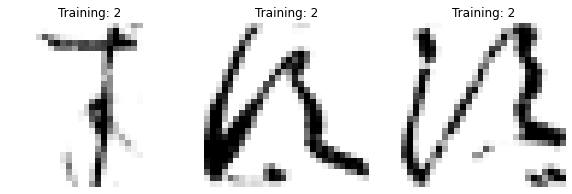

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(label_2)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % image[1])

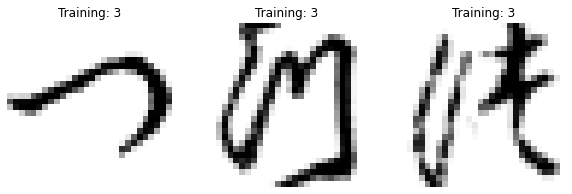

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(label_3)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % image[1])

## Reshaping the features

We'll flatten the 2D 28 x 28 pixel arrays to 1D 784 pixel arrays. We could use scikit-learn's `StandardScaler` here to scale the values to have a 0 mean and 1 std. deviation, but Keras has a built-in scaler, so we'll include that as part of the deep learning model in the next section.

In [123]:
train_images_flat = train_images.reshape(60000, 28*28)

## Implementing a multi-layer perceptron

Using Keras, we'll build up a simple multi-layer perceptron model with an input layer, a scaling layer, 2 hidden dense layers, and an output dense layer.

In [149]:
# Use a sequential, linear stack of layers
model = tf.keras.Sequential()

# Add an input layer
model.add(tf.keras.layers.InputLayer(input_shape=(28*28,)))

# Add a scaler to scale the [0, 255] values to [0, 1]
model.add(tf.keras.layers.Rescaling(scale=1./255))

# Add 2 dense layers with 8 nodes each, with RELU activation functions
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))

# Add a dense layer with N nodes (N being the number of classes) and a softmax activation function
num_classes = len(set(train_labels))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


Now, let's compile the model. The `compile` function takes input arguments for the loss function, the optimizer, and additional metrics to calculate along with loss. Since we're classifying with >2 labels and the labels are provided in integer format, we'll use the `SparseCategoricalCrossentropy` loss function. There are several options for the optimizer class, with no immediately apparent advantages or disadvantages over the others, so we'll use the one that was used in the MNIST tutorial, `RMSprop`. As for additional metrics, we'll take `accuracy`, which is more immediately indicative of the model's performance than loss.

In [150]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

In [151]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


With a freshly-compiled model, we're ready to train! Fitting a deep learning model has more tunable parameters than a run-of-the-mill ML model, but we'll just be tuning the batch size and number of epochs to train over. For the first run, we'll just use a batch size of the default of 32, and 10 epochs.

In [152]:
history = model.fit(
    x=train_images_flat,
    y=train_labels,
    batch_size=32,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 2s 941us/step - loss: 1.0693 - accuracy: 0.6638
Epoch 2/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.6866 - accuracy: 0.7915
Epoch 3/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.6267 - accuracy: 0.8098
Epoch 4/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.5968 - accuracy: 0.8177
Epoch 5/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.5765 - accuracy: 0.8248
Epoch 6/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.5632 - accuracy: 0.8298
Epoch 7/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.5528 - accuracy: 0.8320
Epoch 8/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.5455 - accuracy: 0.8338
Epoch 9/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.5387 - accuracy: 0.8362
Epoch 10/10
1875/1875 [==============================] - 2s 820u

In [156]:
print(f"Accuracy: {(history.history['accuracy'][-1] * 100):.2f}%")

Accuracy: 83.88%


This is decent accuracy for a first pass, but let's play around with some of the parameters. First off, let's "functionize" the creation and training of the model. I want to be able to pass the optimizer, the number of training epochs, the number of hidden dense layers, and the number of nodes in the hidden dense layers as inputs, and get an accuracy score as an output.

In [172]:
def compile_and_fit_model(num_epochs, num_hidden_dense_layers, num_dense_layer_nodes, optimizer):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=(28*28,)))
    model.add(tf.keras.layers.Rescaling(scale=1./255))

    for i in range(0, num_hidden_dense_layers):
        model.add(tf.keras.layers.Dense(
            num_dense_layer_nodes, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.2))

    # Add a dense layer with N nodes (N being the number of classes) and a softmax activation function
    num_classes = len(set(train_labels))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=optimizer,
        metrics=['accuracy']
    )

    history = model.fit(
        x=train_images_flat,
        y=train_labels,
        batch_size=32,
        epochs=num_epochs,
        verbose=0
    )

    print(f"""Epochs:              {num_epochs}
Hidden dense layers: {num_hidden_dense_layers}
Dense layer nodes:   {num_dense_layer_nodes}
Optimizer class:     {type(optimizer)}
Accuracy:            {(history.history['accuracy'][-1] * 100):.2f}%
""")

    return model

First off, we'll try changing up the optimizer. It's difficult to tell which optimizer will perform the best just from the documentation, so we'll run a few experiments.

In [173]:
from tensorflow.keras import optimizers as op

optimizers = [
    op.SGD(),
    op.Adam(),
    op.Adadelta(),
    op.Adagrad(),
    op.Adamax(),
    op.Nadam(),
    op.Ftrl()
]

for _opt in optimizers:
    model = compile_and_fit_model(10, 2, 8, _opt)

Epochs:              10
Hidden dense layers: 2
Dense layer nodes:   8
Optimizer class:     <class 'keras.optimizer_v2.gradient_descent.SGD'>
Accuracy:            57.78%

Epochs:              10
Hidden dense layers: 2
Dense layer nodes:   8
Optimizer class:     <class 'keras.optimizer_v2.adam.Adam'>
Accuracy:            58.60%

Epochs:              10
Hidden dense layers: 2
Dense layer nodes:   8
Optimizer class:     <class 'keras.optimizer_v2.adadelta.Adadelta'>
Accuracy:            14.00%

Epochs:              10
Hidden dense layers: 2
Dense layer nodes:   8
Optimizer class:     <class 'keras.optimizer_v2.adagrad.Adagrad'>
Accuracy:            31.35%

Epochs:              10
Hidden dense layers: 2
Dense layer nodes:   8
Optimizer class:     <class 'keras.optimizer_v2.adamax.Adamax'>
Accuracy:            58.65%

Epochs:              10
Hidden dense layers: 2
Dense layer nodes:   8
Optimizer class:     <class 'keras.optimizer_v2.nadam.Nadam'>
Accuracy:            59.69%

Epochs:        

It looks like the `Nadam` optimizer outperforms the others just slightly, at least with the current, fixed set of parameters. Now, let's generate some permutations of the other parameters to build and fit the model with.

In [ ]:
# more work to be done here

Now, we'll predict the probabilities for each label for each of the testing images. From there, we'll take the label that has the highest probability, which will be used for judging the accuracy.

In [133]:
test_images_flat = test_images.reshape(10000, 28*28)
predictions = model.predict(test_images_flat)

In [135]:
predictions = np.argmax(predictions, axis=1)
predictions.shape

(10000,)

In [136]:
predictions

array([5, 9, 3, ..., 9, 8, 2], dtype=int64)